# Telco Churn Analysis Breakdown

###  By: Xavier Carter

In [1]:
import pandas as pd
import numpy as np
import Aquire
import Prepare
import Explore
import Model
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

### Project Planning

- Create ReadMe.md with data dictionary, business goals, hypothesis and hypothesis testing results
- Aquire information from database 
- Prep and clean the data for more info for more visualizations, document findings and take
- Use visualizations to find possible MVP's, further my MVP testing with statstical analysis
- Create Hypothesis for each mvp,  alpha and find if rejecting the hypothesis is logical
- Create Baseline Accuracy , document positive case and and what measure of accuracy should take precedence
- Train classification models evaluate results
- Choose best preforming model for test case , document findings
- Create csv that documents the customer ID, their churn status, predicted churn status and probability of churn
- Document conclusions / Take aways and next steps

### Executive Summary - Conclusions and next steps

- Models used were Logistic regression, Decision Tree, Random Forest, KNneigbors, all preformed well above the baseline accuracy for the MVPs.
* MVP includes
    * Fiber optic
    * Electronic check 
    * 'monthly_charges
    * tenure
    * Two year'
    * 'None' (No Internet)
    * One Year
- I chose my random forest as it suceeds the best in recall 92.75% of the time but out preforms the baseline accuracy as well.
- Next steps would be to find solutions to make sure our high risk customers do not churn.

### Aquire Data

Get data from the telco_churn database

In [2]:
original_df = Aquire.get_telco_data()

In [3]:
#peek at data
original_df.sample(3)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
3193,6266-QHOJZ,Female,0,No,No,65,Yes,Yes,2,Yes,...,No,2,Yes,1,89.85,5844.65,No,One year,Fiber optic,Electronic check
3732,1658-XUHBX,Female,1,Yes,Yes,59,Yes,Yes,2,No,...,Yes,1,Yes,4,88.75,5348.65,No,Month-to-month,Fiber optic,Credit card (automatic)
3090,4488-KQFDT,Female,0,No,No,61,Yes,Yes,2,No,...,Yes,2,Yes,1,103.95,6423,No,One year,Fiber optic,Electronic check


In [4]:
Aquire.summerize_df(original_df)

-----shape------
7043 rows and 24 columns
---info---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               7043 non-null   object 
 1   gender                    7043 non-null   object 
 2   senior_citizen            7043 non-null   int64  
 3   partner                   7043 non-null   object 
 4   dependents                7043 non-null   object 
 5   tenure                    7043 non-null   int64  
 6   phone_service             7043 non-null   object 
 7   multiple_lines            7043 non-null   object 
 8   internet_service_type_id  7043 non-null   int64  
 9   online_security           7043 non-null   object 
 10  online_backup             7043 non-null   object 
 11  device_protection         7043 non-null   object 
 12  tech_support              7043 non-null   object 
 13  streaming_

#### Aquire - Takeaways
- sql query used made duplicate columns, should remove redundant columns
- total charges is seen as an object but needs to be a float
- catagorical ML algorithms use binary variables, each categorcial variable needs to be binary
- No scaling required for continous variables.
- handle any nulls
- create dummies for any non-binary catergorical variables

### Prepare Data

In [5]:
#prep original data so it can be put into a binary_df
original_df_copy = Prepare.prep_original(original_df)
#create binary dataframe from orignal
binary_df = Prepare.prep_for_model(original_df_copy)


#### Process /Takeaways
- Total charges was converted to a float type as opposed to an object type
- 11 null values found in total charges, since total charges is just a running total and the people who were missing there running total were only customers with a tenure of 0, we can make the case that these are just new customers that havnt posted ther first payment yet,
     * filling these values with a 0 will is justifiable as tenure is calculated by total charges divided by monthly charges
- Each binary catagorical was converted to its binary counter part (1=male, 0=female , 1=yes, 0 = no).
- Each multi catagorical was converted to binary using get_dummies, the original column was removed.

### Explore Data

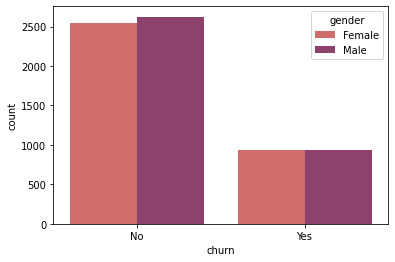

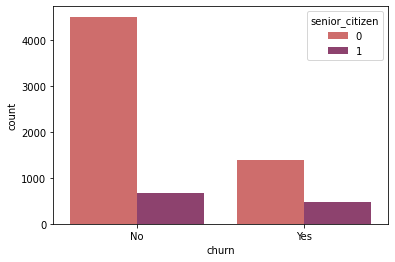

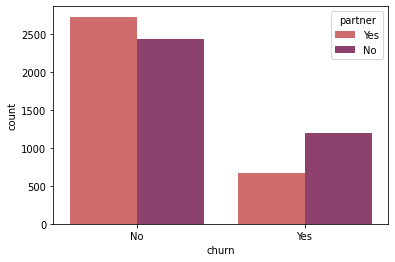

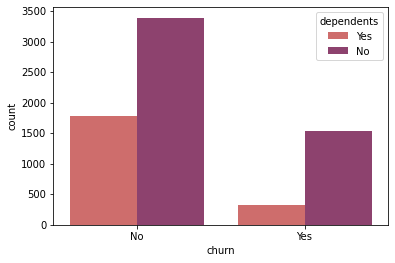

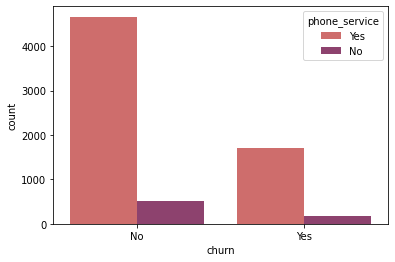

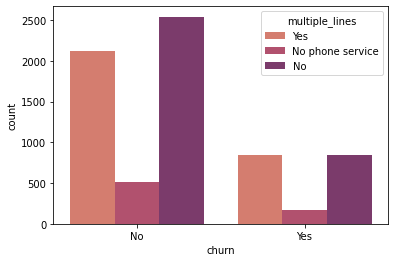

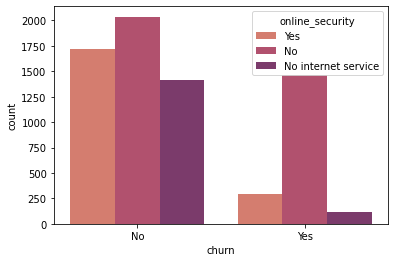

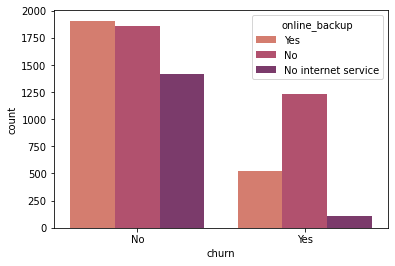

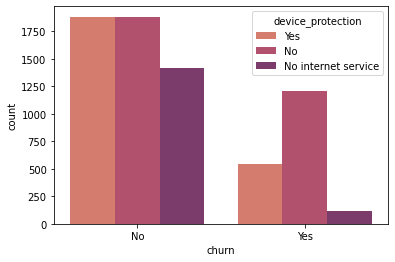

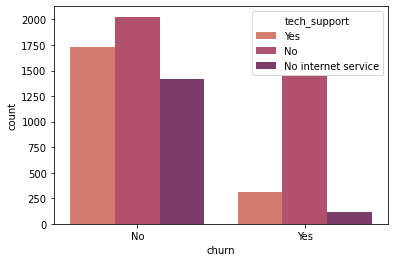

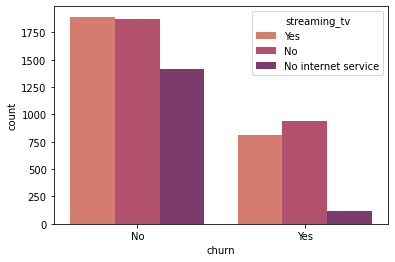

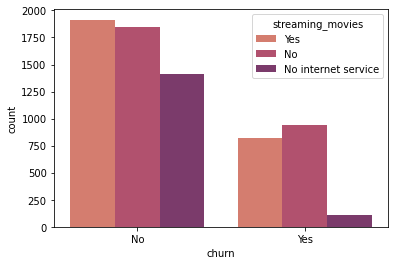

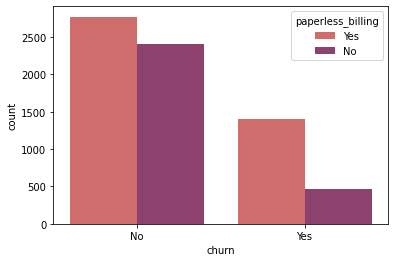

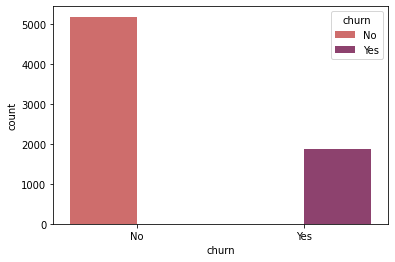

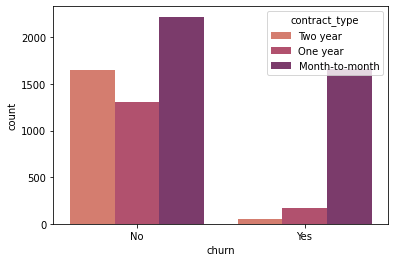

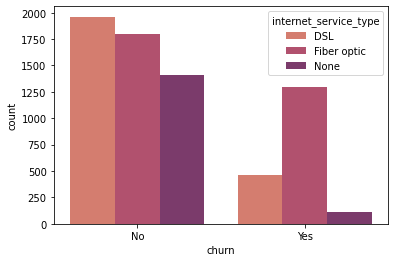

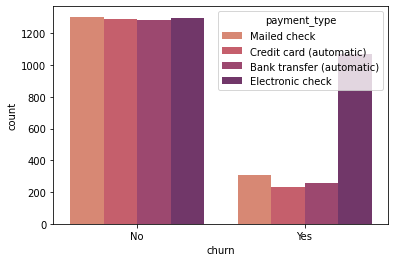

In [6]:
#catagorical variables in relation to churn
Explore.get_cat_stats(original_df)

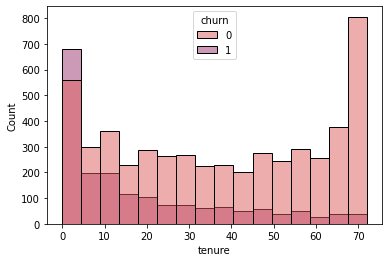

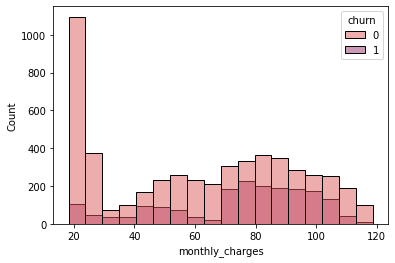

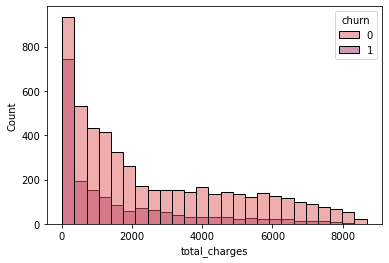

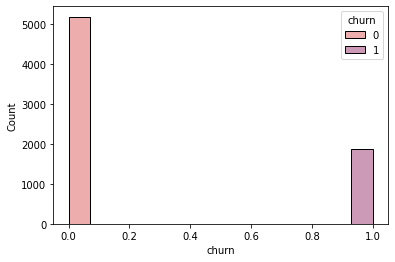

In [7]:
Explore.get_con_stats(binary_df)

<AxesSubplot:title={'center':'Feautures  Correlating with Churn'}>

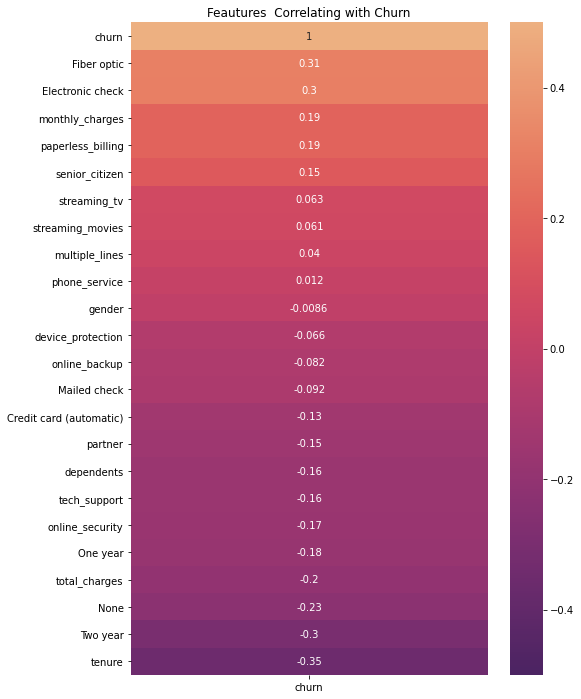

In [8]:
Explore.get_churn_heatmap(binary_df)

#### Takeaways
- Choosing  MVPs for churn
    * positive correlation, top picks = fiber optic, electronic_check, monthly_charges
    * negetive correlation, top picks = tenure, two_year, none(no_internet), One year
- Testing for corralation with statistical tests
     * alpha = 0.5

##### Statistical Analysis

In [68]:
alpha = 0.01

In [69]:
chi_var = ['Fiber optic', 'Electronic check', 'Two year', 'None','One year']
t_test = ['tenure', 'monthly_charges']

In [70]:
#runs a chi-squared contengecy evaluation to see correlation between 2 catagorical variables
Explore.get_chi_test(chi_var, binary_df, alpha)

churn           0     1
Fiber optic            
0            3375   572
1            1799  1297
Null Hyothesis: Fiber optic does not correlate to churn
Alternative hypothesis: Fiber optic does correlate to churn
p value 4.940476033744708e-147 is less than alpha 0.01 , we reject our null hypothesis
-------------------------------------
churn                0     1
Electronic check            
0                 3880   798
1                 1294  1071
Null Hyothesis: Electronic check does not correlate to churn
Alternative hypothesis: Electronic check does correlate to churn
p value 2.5280301640753998e-141 is less than alpha 0.01 , we reject our null hypothesis
-------------------------------------
churn        0     1
Two year            
0         3527  1821
1         1647    48
Null Hyothesis: Two year does not correlate to churn
Alternative hypothesis: Two year does correlate to churn
p value 1.3376802517066984e-141 is less than alpha 0.01 , we reject our null hypothesis
-------------

In [71]:
#looks at a 2-tailed T test to measure correlation with continous vs catergorical variables
Explore.get_t_test(t_test, binary_df, alpha)

Null Hypothesis: as tenure increases overtime ,churn is not affected
Alternative hypothesis: as tenure increases overtime ,churn is affected
p value 0.0 is less than alpha 0.01 , we reject our null hypothesis
-------------------------------------
Null Hypothesis: as monthly_charges increases overtime ,churn is not affected
Alternative hypothesis: as monthly_charges increases overtime ,churn is affected
p value 0.0 is less than alpha 0.01 , we reject our null hypothesis
-------------------------------------


#### Takeaways
-  All mvp can be used as they all rejected the their null hypothesis.

## Model Data 

In [13]:
train, validate, test = Prepare.telco_split(binary_df)

In [14]:
train.shape , validate.shape, test.shape

((3943, 25), (1691, 25), (1409, 25))

In [15]:
x_col = ['Fiber optic','Electronic check', 'monthly_charges', 'tenure', 'Two year', 'None','One year']
y_col = 'churn'

X_train = train[x_col]
y_train = train[y_col]

X_validate = validate[x_col]
y_validate = validate[y_col]

X_test = test[x_col]
y_test = test[y_col]

##### Pre-Modeling steps
- pick a positive. our positive  for this case is 0 or for customers to not churn
- choose what measure takes priority
    * Priority measure is Recall. For this specific data, the worst case scenerio predicting someone to churn when they havnt. We dont want to miss out on high risk customers who should statistically churned when they haven't yet.
    * Predicting a customer to not churn when they have churned is not priority, because focusing on retaining customers takes priority over people who have already decided to leave.
    * a high percentage for recall takes priority as we want to make sure our true positive is as accurate as possible

### Baseline Statistics

In [16]:
Baseline = DummyClassifier(strategy = 'constant' , constant=train.churn.mode())

In [84]:
#get our Baseline information
Model.train_validate_results(Baseline, X_train, y_train, X_validate, y_validate)

Train model Accuracy: 73.47198 % | Validate model accuracy: 73.44766 % 
Train model Recall: 100.00000 % | Validate model Recall: 100.00000 %
Train model Precision: 73.47198 % | Validate model Precision: 73.44766 %
------------------------------------------------------------------------
---------- More Details ------------
-----Train Classification report----
                     0       1  accuracy    macro avg  weighted avg
precision     0.734720     0.0   0.73472     0.367360      0.539813
recall        1.000000     0.0   0.73472     0.500000      0.734720
f1-score      0.847076     0.0   0.73472     0.423538      0.622363
support    2897.000000  1046.0   0.73472  3943.000000   3943.000000
------Validate Classification report-----
                     0      1  accuracy    macro avg  weighted avg
precision     0.734477    0.0  0.734477     0.367238      0.539456
recall        1.000000    0.0  0.734477     0.500000      0.734477
f1-score      0.846914    0.0  0.734477     0.423457    

## Logistic Regression

In [18]:
Logistic_models = [LogisticRegression(C=0.1),
                   LogisticRegression(C=1),
                   LogisticRegression(random_state=123)]

In [19]:
for i in Logistic_models:
    Model.train_validate_results(i, X_train, y_train, X_validate, y_validate)

Train model Accuracy: 79.48263 % | Validate model accuracy: 78.35600 % 
Train model Recall: 90.71453 % | Validate model Recall: 89.53301 %
Train model Precision: 82.95455 % | Validate model Precision: 82.49258 %
------------------------------------------------------------------------
Train model Accuracy: 79.53335 % | Validate model accuracy: 77.94205 % 
Train model Recall: 90.40387 % | Validate model Recall: 88.72786 %
Train model Precision: 83.19568 % | Validate model Precision: 82.54682 %
------------------------------------------------------------------------
Train model Accuracy: 79.53335 % | Validate model accuracy: 77.94205 % 
Train model Recall: 90.40387 % | Validate model Recall: 88.72786 %
Train model Precision: 83.19568 % | Validate model Precision: 82.54682 %
------------------------------------------------------------------------


##### The models preform relatively the same, but model 1 has the best recall. if logistic regression is the best model to use, we will use model one.

In [20]:
Model.train_validate_results(Logistic_models[0],X_train, y_train, X_validate, y_validate, details=True )

Train model Accuracy: 79.48263 % | Validate model accuracy: 78.35600 % 
Train model Recall: 90.71453 % | Validate model Recall: 89.53301 %
Train model Precision: 82.95455 % | Validate model Precision: 82.49258 %
------------------------------------------------------------------------
---------- More Details ------------
-----Train Classification report----
                     0            1  accuracy    macro avg  weighted avg
precision     0.829545     0.652903  0.794826     0.741224      0.782686
recall        0.907145     0.483748  0.794826     0.695446      0.794826
f1-score      0.866612     0.555739  0.794826     0.711175      0.784143
support    2897.000000  1046.000000  0.794826  3943.000000   3943.000000
------Validate Classification report-----
                     0           1  accuracy    macro avg  weighted avg
precision     0.824926    0.620991   0.78356     0.722959      0.770776
recall        0.895330    0.474388   0.78356     0.684859      0.783560
f1-score      0.85

## Decision Tree

In [96]:
Decision_tree_models = [DecisionTreeClassifier(max_depth=5),
                        DecisionTreeClassifier(max_depth=3, max_leaf_nodes=250),
                        DecisionTreeClassifier(max_depth=10)]

In [99]:
for i in Decision_tree_models:
    Model.train_validate_results(i, X_train, y_train, X_validate,y_validate)

Train model Accuracy: 80.39564 % | Validate model accuracy: 77.82377 % 
Train model Recall: 91.57749 % | Validate model Recall: 89.45250 %
Train model Precision: 83.37524 % | Validate model Precision: 81.99262 %
------------------------------------------------------------------------
Train model Accuracy: 79.45727 % | Validate model accuracy: 78.29687 % 
Train model Recall: 93.40697 % | Validate model Recall: 92.02899 %
Train model Precision: 81.38346 % | Validate model Precision: 81.00638 %
------------------------------------------------------------------------
Train model Accuracy: 86.73599 % | Validate model accuracy: 76.04967 % 
Train model Recall: 94.75319 % | Validate model Recall: 87.03704 %
Train model Precision: 88.09371 % | Validate model Precision: 81.58491 %
------------------------------------------------------------------------


##### Model 3 has the highest Train accuracy but is too overfit for the model to be used with certainty. even though model 2 is slightly overfit in terms of accuracy, if a mode were to be, since recall is priority we will use model 2

In [101]:
Model.train_validate_results(Decision_tree_models[1],X_train, y_train, X_validate, y_validate, details=True )

Train model Accuracy: 79.45727 % | Validate model accuracy: 78.29687 % 
Train model Recall: 93.40697 % | Validate model Recall: 92.02899 %
Train model Precision: 81.38346 % | Validate model Precision: 81.00638 %
------------------------------------------------------------------------
---------- More Details ------------
-----Train Classification report----
                     0            1  accuracy    macro avg  weighted avg
precision     0.813835     0.690939  0.794573     0.752387      0.781233
recall        0.934070     0.408222  0.794573     0.671146      0.794573
f1-score      0.869817     0.513221  0.794573     0.691519      0.775219
support    2897.000000  1046.000000  0.794573  3943.000000   3943.000000
------Validate Classification report-----
                     0           1  accuracy    macro avg  weighted avg
precision     0.810064    0.646429  0.782969     0.728246      0.766615
recall        0.920290    0.403118  0.782969     0.661704      0.782969
f1-score      0.86

## Random Forest

In [24]:
Random_Forest_models = [RandomForestClassifier(max_depth=4, max_leaf_nodes= 150),
                        DecisionTreeClassifier(max_depth=5, max_leaf_nodes= 250),
                        DecisionTreeClassifier(max_depth=10)]

In [25]:
for i in Random_Forest_models:
    Model.train_validate_results(i, X_train, y_train, X_validate,y_validate)

Train model Accuracy: 79.66016 % | Validate model accuracy: 78.65169 % 
Train model Recall: 93.61408 % | Validate model Recall: 92.75362 %
Train model Precision: 81.46591 % | Validate model Precision: 80.95573 %
------------------------------------------------------------------------
Train model Accuracy: 80.39564 % | Validate model accuracy: 77.82377 % 
Train model Recall: 91.57749 % | Validate model Recall: 89.45250 %
Train model Precision: 83.37524 % | Validate model Precision: 81.99262 %
------------------------------------------------------------------------
Train model Accuracy: 86.73599 % | Validate model accuracy: 75.69486 % 
Train model Recall: 94.54608 % | Validate model Recall: 86.39291 %
Train model Precision: 88.24098 % | Validate model Precision: 81.59696 %
------------------------------------------------------------------------


##### Model 3 has the highest Train accuracy but is too overfit for the model to be used with certainty. even though model 1 is slightly overfit in terms of accuracy, if a mode were to be, since recall is priority we will use model 1

In [26]:
 Model.train_validate_results(Random_Forest_models[0], X_train, y_train, X_validate,y_validate, details=True)

Train model Accuracy: 79.63480 % | Validate model accuracy: 78.41514 % 
Train model Recall: 93.89023 % | Validate model Recall: 92.75362 %
Train model Precision: 81.29109 % | Validate model Precision: 80.72880 %
------------------------------------------------------------------------
---------- More Details ------------
-----Train Classification report----
                     0            1  accuracy    macro avg  weighted avg
precision     0.812911     0.703518  0.796348     0.758214      0.783891
recall        0.938902     0.401530  0.796348     0.670216      0.796348
f1-score      0.871376     0.511260  0.796348     0.691318      0.775844
support    2897.000000  1046.000000  0.796348  3943.000000   3943.000000
------Validate Classification report-----
                     0           1  accuracy    macro avg  weighted avg
precision     0.807288    0.659091  0.784151     0.733189      0.767938
recall        0.927536    0.387528  0.784151     0.657532      0.784151
f1-score      0.86

## K-Nearest Neighbor 

In [27]:
Kn_models = [KNeighborsClassifier(n_neighbors=5),
             KNeighborsClassifier(n_neighbors=10),
             KNeighborsClassifier(n_neighbors=40)]

In [28]:
for i in Kn_models:
     Model.train_validate_results(i, X_train, y_train, X_validate,y_validate)

Train model Accuracy: 83.36292 % | Validate model accuracy: 74.45299 % 
Train model Recall: 91.37038 % | Validate model Recall: 85.66828 %
Train model Precision: 86.70160 % | Validate model Precision: 80.72838 %
------------------------------------------------------------------------
Train model Accuracy: 82.32310 % | Validate model accuracy: 76.10881 % 
Train model Recall: 93.71764 % | Validate model Recall: 89.85507 %
Train model Precision: 84.05573 % | Validate model Precision: 80.05739 %
------------------------------------------------------------------------
Train model Accuracy: 79.81233 % | Validate model accuracy: 77.94205 % 
Train model Recall: 92.47497 % | Validate model Recall: 90.74074 %
Train model Precision: 82.25361 % | Validate model Precision: 81.37184 %
------------------------------------------------------------------------


#### Model 1 has the highest Train accuracy but is too overfit for the model to be used with certainty. even though model 3 is slightly overfit in terms of accuracy, if a mode were to be, since recall is priority we will use model 3

In [29]:
 Model.train_validate_results(Kn_models[2], X_train, y_train, X_validate,y_validate, details=True)

Train model Accuracy: 79.81233 % | Validate model accuracy: 77.94205 % 
Train model Recall: 92.47497 % | Validate model Recall: 90.74074 %
Train model Precision: 82.25361 % | Validate model Precision: 81.37184 %
------------------------------------------------------------------------
---------- More Details ------------
-----Train Classification report----
                     0            1  accuracy    macro avg  weighted avg
precision     0.822536     0.682216  0.798123     0.752376      0.785312
recall        0.924750     0.447419  0.798123     0.686084      0.798123
f1-score      0.870653     0.540416  0.798123     0.705534      0.783048
support    2897.000000  1046.000000  0.798123  3943.000000   3943.000000
------Validate Classification report-----
                     0           1  accuracy    macro avg  weighted avg
precision     0.813718    0.624183   0.77942     0.718951      0.763392
recall        0.907407    0.425390   0.77942     0.666399      0.779420
f1-score      0.85

### Train/Validate Takeaways

- After comparing all the training models, Random Forest handled best with a 93% recall rate
- we will use our best random forest model to run on our test data

### Test

In [79]:
Model.test_results(Random_Forest_models[0],X_test, y_test, details=True)

Test model Accuracy: 80.62456 %
Test model Recall: 93.71981 % 
Test model Precision: 82.34295 %
---------- More Details ------------
-----Test Classification report----
                     0           1  accuracy    macro avg  weighted avg
precision     0.823430    0.718615  0.806246     0.771022      0.795608
recall        0.937198    0.443850  0.806246     0.690524      0.806246
f1-score      0.876638    0.548760  0.806246     0.712699      0.789607
support    1035.000000  374.000000  0.806246  1409.000000   1409.000000
-----Test Confusion Matrix------
               Actual No Churn  Actual Churn 
Pred No Churn              970            208
Pred Churn                  65            166


### Test Takeaways

- Test does relativly well in all catagories. with a 93.71% recall rate
- Based on the mvp's, the machine learning model can predict who stays with the company 93% of the time based off our churn mvps

## Churn Probabilities
- After finding our best model, we can apply it to our complete dataframe in order to know the probability of each customer churning

In [80]:
customer_results = Model.get_customer_predictions(Random_Forest_models[0], test, X_test)

In [81]:
customer_results = customer_results.sort_values(by='churn probability')
customer_results.to_csv('Churn Probability.csv')

- This information can be very useful to get a deliverable of customers who have a high risk of churning, but havent. This allows telco to make the nessesary changes to make sure high risk customers dont churn

In [82]:
high_risk_percent = 50
high_risk_customers = customer_results[(customer_results['churn'] == 0) &(customer_results['churn probability'] >= high_risk_percent)]

In [83]:
high_risk_customers.to_csv("high_risk_customers.csv")
high_risk_customers.sample(5)

,customer_id,churn,churn prediction,churn probability
5257,8775-ERLNB,0,1,70.309647
4793,6435-SRWBJ,0,1,66.958221
3831,2135-DQWAQ,0,1,60.300665
5120,8035-PWSEV,0,1,61.991859
5222,8617-ENBDS,0,1,58.363933
